#  Import Packages

In [200]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

#  Read Dataset & Info

In [201]:
df = pd.read_csv('scrap_price.csv')

In [202]:
print("Data Shape:" , df.shape , "\n")
print("Data Head : \n")
df.head(10)

Data Shape: (205, 26) 

Data Head : 



,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [203]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [204]:
df.info() #info of non null columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [205]:
#Sum of NaN values
df.isna().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [206]:
df.dtypes

ID                    int64
symboling             int64
name                 object
fueltypes            object
aspiration           object
doornumbers          object
carbody              object
drivewheels          object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

#  Data PreProcessing

In [207]:
print(df.columns.tolist())

['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [208]:
#Putting columns with NaN values in a list
nan = []
for column in df.columns:
    if df[column].isna().sum():
        nan.append(column)
print(nan)

[]


In [209]:
#Filling the NaN values with the mean
for column in nan:
    df[column].fillna(df[column].mean(), inplace=True)

In [210]:
df.isna().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [211]:
# drop ID column
df.drop(["ID"], inplace=True, axis=1)

In [212]:
df.name.value_counts()

name
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [213]:
encoder = LabelEncoder()
df["name"]= encoder.fit_transform(df["name"])

In [214]:
df.name.value_counts()

name
120    6
115    6
85     6
107    4
66     3
      ..
55     1
61     1
51     1
52     1
142    1
Name: count, Length: 147, dtype: int64

In [215]:
df.fueltypes.value_counts()

fueltypes
gas       185
diesel     20
Name: count, dtype: int64

In [216]:
encoder = LabelEncoder()
df["fueltypes"]= encoder.fit_transform(df["fueltypes"])

In [217]:
df.fueltypes.value_counts()

fueltypes
1    185
0     20
Name: count, dtype: int64

In [218]:
df.aspiration.value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [219]:
encoder = LabelEncoder()
df["aspiration"]= encoder.fit_transform(df["aspiration"])

In [220]:
df.aspiration.value_counts()

aspiration
0    168
1     37
Name: count, dtype: int64

In [221]:
df.doornumbers.value_counts()

doornumbers
four    115
two      90
Name: count, dtype: int64

In [222]:
encoder = LabelEncoder()
df["doornumbers"]= encoder.fit_transform(df["doornumbers"])

In [223]:
df.doornumbers.value_counts()

doornumbers
0    115
1     90
Name: count, dtype: int64

In [224]:
df.carbody.value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [225]:
encoder = LabelEncoder()
df["carbody"]= encoder.fit_transform(df["carbody"])

In [226]:
df.carbody.value_counts()

carbody
3    96
2    70
4    25
1     8
0     6
Name: count, dtype: int64

In [227]:
df.drivewheels.value_counts()

drivewheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [228]:
encoder = LabelEncoder()
df["drivewheels"]= encoder.fit_transform(df["drivewheels"])

In [229]:
df.drivewheels.value_counts()

drivewheels
1    120
2     76
0      9
Name: count, dtype: int64

In [230]:
df.enginelocation.value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [231]:
encoder = LabelEncoder()
df["enginelocation"]= encoder.fit_transform(df["enginelocation"])

In [232]:
df.enginelocation.value_counts()

enginelocation
0    202
1      3
Name: count, dtype: int64

In [233]:
df.enginetype.value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [234]:
encoder = LabelEncoder()
df["enginetype"]= encoder.fit_transform(df["enginetype"])

In [235]:
df.enginetype.value_counts()

enginetype
3    148
4     15
5     13
0     12
2     12
6      4
1      1
Name: count, dtype: int64

In [236]:
df.cylindernumber.value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [237]:
encoder = LabelEncoder()
df["cylindernumber"]= encoder.fit_transform(df["cylindernumber"])

In [238]:
df.cylindernumber.value_counts()

cylindernumber
2    159
3     24
1     11
0      5
6      4
4      1
5      1
Name: count, dtype: int64

In [239]:
df.fuelsystem.value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [240]:
encoder = LabelEncoder()
df["fuelsystem"]= encoder.fit_transform(df["fuelsystem"])

In [241]:
df.fuelsystem.value_counts()

fuelsystem
5    94
1    66
3    20
0    11
6     9
2     3
4     1
7     1
Name: count, dtype: int64

In [242]:
pd.set_option('display.max_columns', None)
df.head(20)

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,9,1,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,5,1,0,0,3,1,0,105.8,192.7,71.4,55.7,2844,3,1,136,5,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,7,1,0,0,4,1,0,105.8,192.7,71.4,55.7,2954,3,1,136,5,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,6,1,1,0,3,1,0,105.8,192.7,71.4,55.9,3086,3,1,131,5,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,8,1,1,1,2,0,0,99.5,178.2,67.9,52.0,3053,3,1,131,5,3.13,3.40,7.0,160,5500,16,22,17859.167


#  **Model**

In [243]:
# Split the data into features and target
X = df.drop('price', axis=1) # features
y = df['price']              # target

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [244]:
# Initialize the model
regr = LinearRegression()

# Train the Model
regr.fit(X_train, y_train)

# Test the Model
y_pred = regr.predict(X_test)

# Prediction

In [245]:
# Predict New Values:
new_data = pd.DataFrame({
    'symboling': [3],
    'name': [2],
    'fueltypes': [1],
    'aspiration': [0],
    'doornumbers': [1],
    'carbody': [0],
    'drivewheels': [2],
    'enginelocation': [0],
    'wheelbase': [88.6],
    'carlength': [168.8],
    'carwidth': [64.1],
    'carheight': [48.8],
    'curbweight': [2548],    
    'enginetype': [0],
    'cylindernumber': [2],
    'enginesize': [130],
    'fuelsystem': [5],
    'boreratio': [3.47],
    'stroke': [2.68],
    'compressionratio': [9],
    'horsepower': [111],
    'peakrpm': [5000],
    'citympg': [21],
    'highwaympg': [27],
})
new_data_scaled = scaler.transform(new_data)
new_predictions = regr.predict(new_data_scaled)
print(new_predictions)

[15308.46209276]


# Visualisation

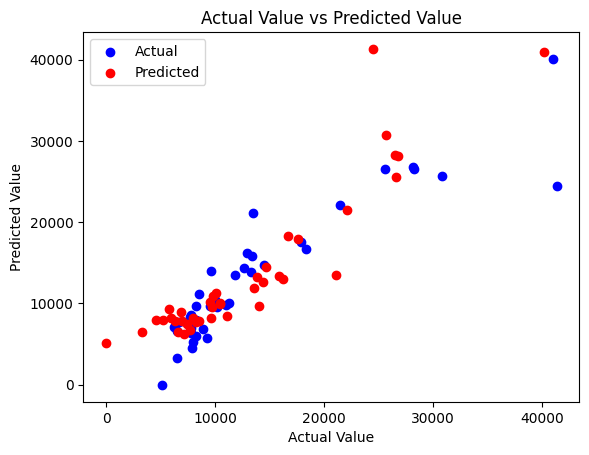

In [246]:
# Assuming y_test and y_pred are your actual and predicted values
# Scatter plot for actual vs predicted values, actual in blue and predicted in red
plt.scatter(y_test, y_pred, color='blue', label='Actual')
plt.scatter(y_pred, y_test, color='red', label='Predicted')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual Value vs Predicted Value")
plt.legend()
plt.show()

# Evaluation

In [247]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2136.7804733922053
Root Mean Squared Error: 3546.155781629605
R-squared: 0.8407071151499269
